In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [26]:
import keras as k
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [51]:
import matplotlib
import matplotlib.pyplot as plt
from plot_functions import adjustAxeProperties, plot_keras_history_loss_and_acuracy
%matplotlib inline
matplotlib.style.use('ggplot')

In [23]:
base_dir = os.path.expanduser('~/ml_datasets/cats_and_dogs_small')

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

In [24]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [25]:
print('total training cat images: {}'.format(len(os.listdir(train_cats_dir))))
print('total training dog images: {}'.format(len(os.listdir(train_dogs_dir))))
print('')
print('total validation cat images: {}'.format(len(os.listdir(validation_cats_dir))))
print('total validation dog images: {}'.format(len(os.listdir(validation_dogs_dir))))
print('')
print('total test cat images: {}'.format(len(os.listdir(test_cats_dir))))
print('total test dog images: {}'.format(len(os.listdir(test_dogs_dir))))

total training cat images: 1000
total training dog images: 1000

total validation cat images: 500
total validation dog images: 500

total test cat images: 500
total test dog images: 500


In [40]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [38]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

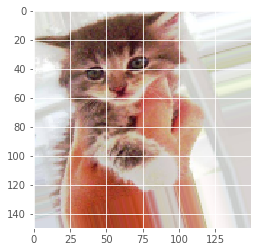

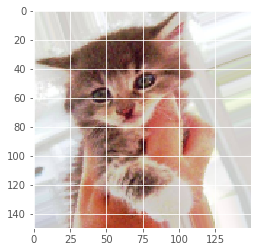

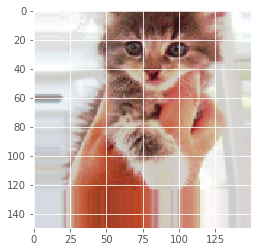

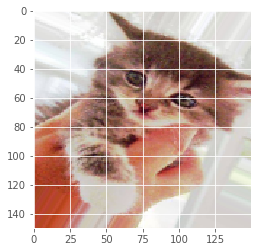

In [41]:
plt.close('all')
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
model.add(k.layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(150, 150, 3))
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu')
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu')
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu')
)
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(k.layers.Flatten())
model.add(k.layers.Dropout(0.5))
model.add(k.layers.Dense(512, activation='relu'))
model.add(k.layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=k.optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,    
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

In [61]:
def plot_history(history):
    FONTSIZE = 23
    plt.close('all')
    fig = plt.figure(figsize=(18, 7.5))
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    epochs = range(1, len(history.history['loss']) + 1)

    # plot loss function
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    ax = plt.subplot(gs[0, 0])
    ax.plot(epochs, train_loss, marker='o', label='training loss')
    ax.plot(epochs, val_loss, marker='x', label='validation loss')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylim(0)
    ax.set_xticks(np.arange(1, len(epochs)+1, 10))
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Loss fucntion', fontsize=FONTSIZE)


    # plot acuracy
    train_acuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    ax = plt.subplot(gs[0, 1])
    ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
    ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylim(0, 1.05)    
    ax.set_xticks(np.arange(1, len(epochs)+1, 10))
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)    
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Accuracy', fontsize=FONTSIZE)

    plt.tight_layout(w_pad=3.0, h_pad=1)

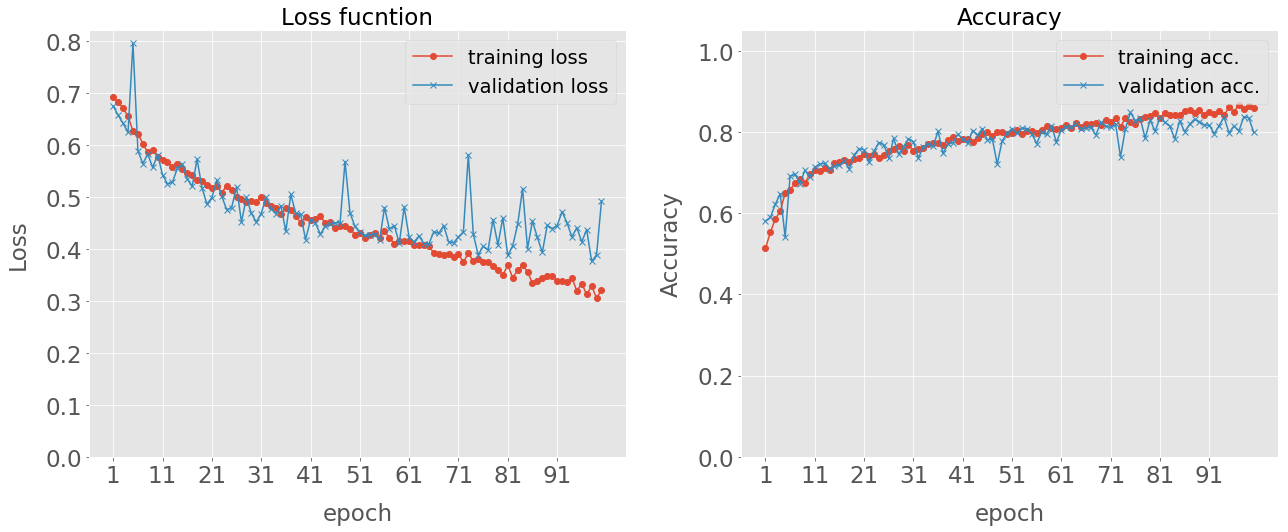

In [62]:
plot_history(history)